In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define file path in Google Drive
file_path = "/content/drive/My Drive/cleaned_encoded.csv"
df=pd.read_csv(file_path)

Mounted at /content/drive


In [2]:
pd.set_option('display.max_columns', None)
df

,Location,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temperature9am,Temperature3pm,CloudBurst Today,CloudBurstTomorrow,Year,Month,Day,WindGustDirection_sin,WindGustDirection_cos,WindDirection9am_sin,WindDirection9am_cos,WindDirection3pm_sin,WindDirection3pm_cos
0,0.203289,13.4,22.900000,0.6,5.318667,7.611178,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1,-1.000000,-1.836970e-16,-1.000000,-1.836970e-16,-0.923880,3.826834e-01
1,0.203289,7.4,25.100000,0.0,5.318667,7.611178,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2,-0.923880,3.826834e-01,-0.382683,9.238795e-01,-0.923880,-3.826834e-01
2,0.203289,12.9,25.700000,0.0,5.318667,7.611178,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3,-0.923880,-3.826834e-01,-1.000000,-1.836970e-16,-0.923880,-3.826834e-01
3,0.203289,9.2,28.000000,0.0,5.318667,7.611178,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4,0.707107,7.071068e-01,0.707107,-7.071068e-01,1.000000,6.123234e-17
4,0.203289,17.5,32.300000,1.0,5.318667,7.611178,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5,-1.000000,-1.836970e-16,0.923880,3.826834e-01,-0.707107,7.071068e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0.073511,2.8,23.400000,0.0,5.318667,7.611178,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0,2017,6,21,1.000000,6.123234e-17,0.707107,-7.071068e-01,0.923880,3.826834e-01
145456,0.073511,3.6,25.300000,0.0,5.318667,7.611178,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0,2017,6,22,-0.382683,9.238795e-01,0.707107,-7.071068e-01,0.000000,1.000000e+00
145457,0.073511,5.4,26.900000,0.0,5.318667,7.611178,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0,2017,6,23,0.000000,1.000000e+00,0.707107,-7.071068e-01,-0.923880,3.826834e-01
145458,0.073511,7.8,27.000000,0.0,5.318667,7.611178,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,0,2017,6,24,0.707107,-7.071068e-01,0.382683,-9.238795e-01,0.000000,1.000000e+00


In [3]:
df.columns


Index(['Location', 'MinimumTemperature', 'MaximumTemperature', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temperature9am',
       'Temperature3pm', 'CloudBurst Today', 'CloudBurstTomorrow', 'Year',
       'Month', 'Day', 'WindGustDirection_sin', 'WindGustDirection_cos',
       'WindDirection9am_sin', 'WindDirection9am_cos', 'WindDirection3pm_sin',
       'WindDirection3pm_cos'],
      dtype='object')

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [5]:
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['Day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)
df['Day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)

In [6]:
df.drop(['Month', 'Day', 'Year'], axis=1, inplace=True)

In [22]:
# Drop irrelevant columns
X = df.drop(['CloudBurstTomorrow', 'CloudBurst Today'], axis=1)
y = df['CloudBurstTomorrow']


In [23]:
X.columns

Index(['Location', 'MinimumTemperature', 'MaximumTemperature', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temperature9am',
       'Temperature3pm', 'WindGustDirection_sin', 'WindGustDirection_cos',
       'WindDirection9am_sin', 'WindDirection9am_cos', 'WindDirection3pm_sin',
       'WindDirection3pm_cos', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos'],
      dtype='object')

In [28]:
import numpy as np

# Check and reshape if not already 3D
if len(X_train.shape) == 2:
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (116368, 1, 26)
X_test shape: (29092, 1, 26)


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the model
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[2]), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.7981 - loss: 0.6545 - val_accuracy: 0.8395 - val_loss: 0.3704
Epoch 2/20
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8358 - loss: 0.3798 - val_accuracy: 0.8379 - val_loss: 0.3701
Epoch 3/20
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8383 - loss: 0.3741 - val_accuracy: 0.8360 - val_loss: 0.3732
Epoch 4/20
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8370 - loss: 0.3765 - val_accuracy: 0.8335 - val_loss: 0.3784
Epoch 5/20
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8372 - loss: 0.3759 - val_accuracy: 0.8394 - val_loss: 0.3705
Epoch 6/20
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8401 - loss: 0.3700 - val_accuracy: 0.8404 - val_loss: 0.3670
Epoch 7/20
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8395 - loss: 0.3730 - val_accuracy: 0.8416 - val_loss: 0.3694
Epoch 8/20
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8417 - loss: 0

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")
#Test Accuracy: 0.8414

910/910 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8398 - loss: 0.3721
Test Accuracy: 0.8418


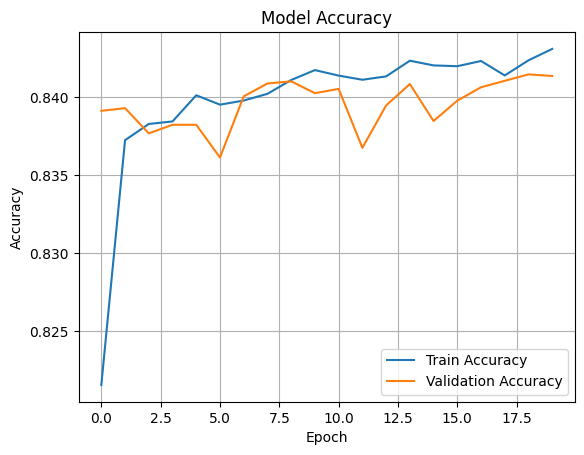

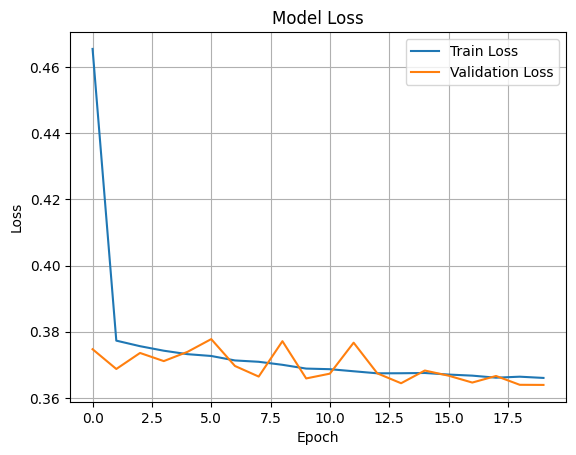

In [19]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [38]:
# For training set
print("Training Set:")
print("0s:", np.sum(y_train == 0))
print("1s:", np.sum(y_train == 1))

# For test set
print("Test Set:")
print("0s:", np.sum(y_test == 0))
print("1s:", np.sum(y_test == 1))


Training Set:
0s: 90911
1s: 25457
Test Set:
0s: 22672
1s: 6420
